In [5]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

C:\Users\Chinmaya Kolhe\AppData\Local\Temp\ipykernel_21500\1334649038.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


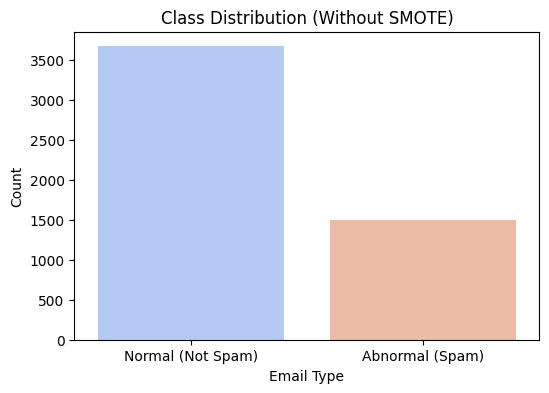

In [6]:
data = pd.read_csv("emails.csv") 
# Separate features and target 
X = data.drop(columns=["Email No.", "Prediction"]) 
y = data["Prediction"] 
# Visualize class distribution 
plt.figure(figsize=(6, 4)) 
sns.countplot(x=y, palette="coolwarm") 
plt.xticks([0, 1], ["Normal (Not Spam)", "Abnormal (Spam)"]) 
plt.title("Class Distribution (Without SMOTE)") 
plt.xlabel("Email Type") 
plt.ylabel("Count") 
plt.show()

In [7]:
# ---------------------- STEP 2: TRAIN-TEST SPLIT ---------------------- 
X_train, X_test, y_train, y_test = train_test_split( 
X, y, test_size=0.2, random_state=42 
)

In [8]:
# ---------------------- STEP 3: FEATURE SCALING ---------------------- 
scaler = StandardScaler(with_mean=False) 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [9]:
# ---------------------- STEP 4: TRAIN SVM MODEL ---------------------- 
svm_model = SVC(kernel='linear', random_state=42) 
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
# ---------------------- STEP 5: MAKE PREDICTIONS ---------------------- 
y_pred = svm_model.predict(X_test_scaled) 
 
# ---------------------- STEP 6: MANUAL METRIC CALCULATION ---------------------- 
 
# Compute confusion matrix components 
TP = np.sum((y_pred == 1) & (y_test == 1)) 
TN = np.sum((y_pred == 0) & (y_test == 0)) 
FP = np.sum((y_pred == 1) & (y_test == 0)) 
FN = np.sum((y_pred == 0) & (y_test == 1)) 
 
# Calculate metrics manually 
precision = TP / (TP + FP) if (TP + FP) != 0 else 0 
recall = TP / (TP + FN) if (TP + FN) != 0 else 0 
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0 
accuracy = (TP + TN) / (TP + TN + FP + FN)

      Manual Evaluation Metrics (SVM Email Spam Detection):

True Positives (TP): 273
True Negatives (TN): 707
False Positives (FP): 32
False Negatives (FN): 23

   Accuracy:  94.69%
       Precision: 0.90
    Recall:    0.92
          F1-Score:  0.91


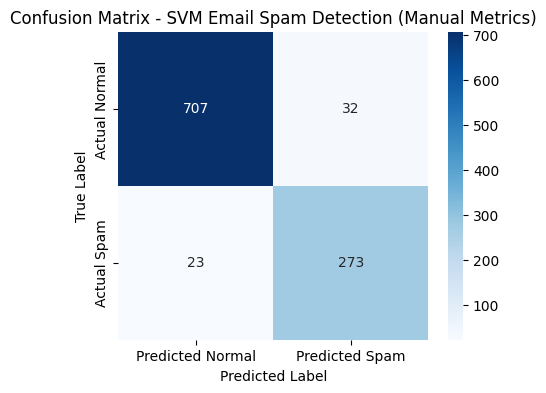

In [11]:
# ---------------------- STEP 7: DISPLAY RESULTS ---------------------- 
print("      Manual Evaluation Metrics (SVM Email Spam Detection):\n") 
print(f"True Positives (TP): {TP}") 
print(f"True Negatives (TN): {TN}") 
print(f"False Positives (FP): {FP}") 
print(f"False Negatives (FN): {FN}\n") 
print(f"   Accuracy:  {accuracy * 100:.2f}%") 
print(f"       Precision: {precision:.2f}") 
print(f"    Recall:    {recall:.2f}") 
print(f"          F1-Score:  {f1:.2f}") 
 
# ---------------------- STEP 8: CONFUSION MATRIX VISUALIZATION ---------------------- 
cm = np.array([[TN, FP], 
               [FN, TP]]) 
 
plt.figure(figsize=(5, 4)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Normal', 'Predicted Spam'], 
            yticklabels=['Actual Normal', 'Actual Spam']) 
plt.title("Confusion Matrix - SVM Email Spam Detection (Manual Metrics)") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.show() 